In [1]:
import pandas as pd

# Cargar el archivo CSV
ruta = r"C:\Users\46210843\OneDrive - Universidad Nacional Abierta y a Distancia\6TO SEMESTRE\ANÁLISIS DE DATOS\trabajo 4\Mall_Customers.csv"
df = pd.read_csv(ruta)

# Selección de variables
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [2]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
#Se observa que existen algunos valores extremos, pero no afectan significativamente la estructura jerárquica del modelo. Se decidió conservarlos para no alterar la jerarquía natural de agrupamiento.


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


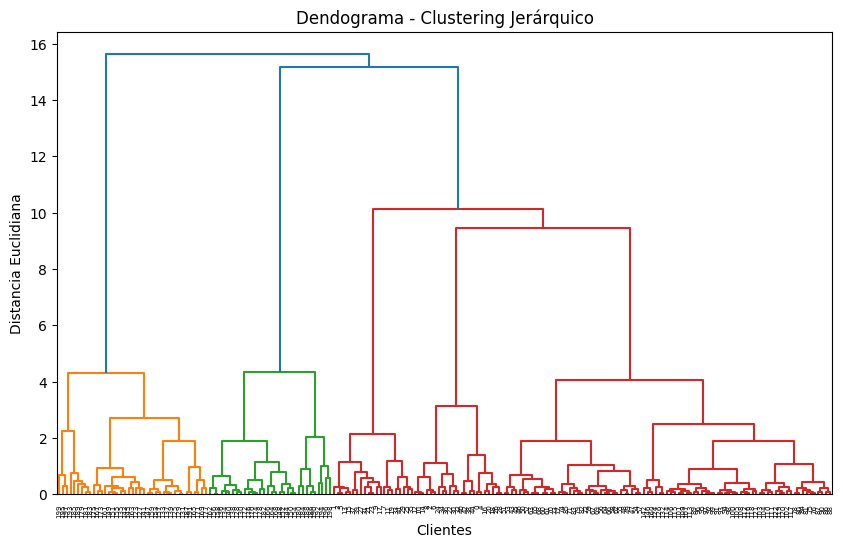

In [5]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendograma - Clustering Jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclidiana")
plt.show()


In [6]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, linkage='ward') 
y_hc = hc.fit_predict(X_scaled)



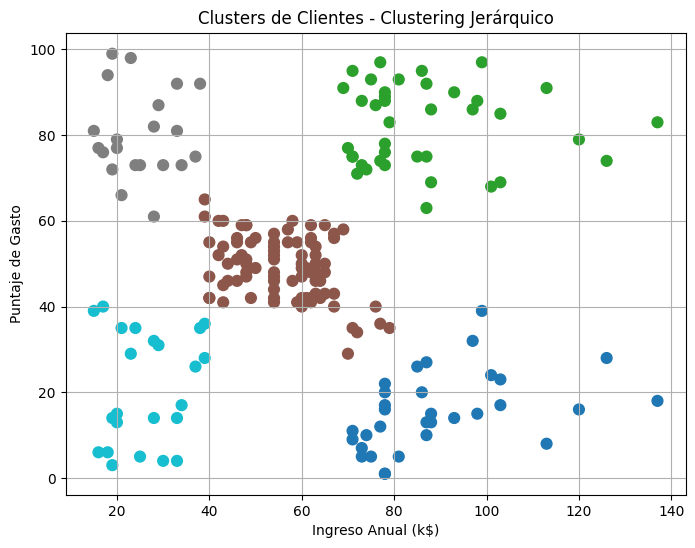

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=y_hc, cmap='tab10', s=60)
plt.title("Clusters de Clientes - Clustering Jerárquico")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntaje de Gasto")
plt.grid(True)
plt.show()


In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

silhouette_hc = silhouette_score(X_scaled, y_hc)
calinski_hc = calinski_harabasz_score(X_scaled, y_hc)

print(f"Silhouette Score (HC): {silhouette_hc:.4f}")
print(f"Calinski-Harabasz Index (HC): {calinski_hc:.4f}")


Silhouette Score (HC): 0.5538
Calinski-Harabasz Index (HC): 244.4103


In [9]:
### Interpretación del Modelo de Clustering Jerárquico

###El modelo de agrupamiento jerárquico fue aplicado al conjunto de datos de clientes del centro comercial utilizando las variables `Annual Income (k$)` y `Spending Score (1-100)`. Estas variables fueron previamente normalizadas para garantizar que ambas tuvieran el mismo peso en la agrupación.

###El dendograma generado muestra visualmente cómo se agrupan los clientes con base en su similitud. El corte más pronunciado del dendograma sugiere la existencia de 5 clusters principales, por lo que se configuró el modelo con `n_clusters=5`.

###A diferencia del modelo K-Means, que se basa en centroides, el clustering jerárquico construye una jerarquía de similitud entre instancias que permite entender cómo se agrupan los datos de manera progresiva.

###Los resultados del modelo muestran una segmentación efectiva, respaldada por métricas cuantitativas:

###- Silhouette Score: `0.5538`, lo que indica una separación aceptable entre clusters y buena cohesión dentro de cada grupo.
###- Índice de Calinski-Harabasz: `244.41`, lo que sugiere que los clusters están bien definidos y separados.

### Valor del modelo

###Este modelo es particularmente útil en fases exploratorias o cuando se requiere interpretar gráficamente cómo se agrupan los datos. Además, no necesita que se especifique el número de clusters inicialmente, y el dendograma ofrece una visualización intuitiva para tomar esa decisión.

### Conclusión

###El modelo de clustering jerárquico permitió identificar cinco perfiles diferenciados de clientes con base en su ingreso anual y comportamiento de gasto. Esto puede facilitar el diseño de campañas de marketing más específicas, ofertas segmentadas y estrategias de retención para cada grupo.

###En comparación con K-Means, el modelo jerárquico es más interpretativo gracias a su estructura jerárquica, aunque menos eficiente computacionalmente para grandes volúmenes de datos.


In [10]:
### Análisis Final

#La revisión de datos faltantes y valores extremos confirmó que el dataset estaba en condiciones adecuadas para aplicar los modelos de clustering. Los resultados obtenidos muestran que tanto K-Means como Clustering Jerárquico ofrecen segmentaciones claras, con grupos diferenciados en función de ingreso y gasto. La elección del modelo dependerá del contexto: K-Means es más eficiente para grandes volúmenes, mientras que el jerárquico es más interpretativo.

#Ambos modelos permiten extraer información útil para estrategias comerciales y de marketing enfocadas en las características reales de los clientes.
